In [60]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import math
import time

NUM_LED = 64
root = int(math.sqrt(NUM_LED))

In [61]:
# Store as string representation of colour of hex ie '#0f0f0f'
DEFAULT_COLOUR = '#ffffff'      # White
arr_led = [DEFAULT_COLOUR for i in range(NUM_LED)]

x_val = []
for i in range(root):
    x_val = np.append(x_val, np.arange(start=1, stop=root+1))

y_val = []
for i in range(root):
    y_val = np.append(y_val, (i+1)*np.ones(root, dtype=int))

In [62]:
# Amplitude function
SCALE = 8

def get_size(led_colour: str) -> int:
    led_colour = led_colour.split('#')[1]
    BIT_CHK = 0xFF
    BYTE = 8
    size = int(led_colour, base=16)
    max = 0
    while size > 0:
        temp = size & BIT_CHK
        if temp > max:
            max = temp
        size = size >> BYTE
    return max

# Can replace with volume/amplitude matrix
size_led = [get_size(led) for led in arr_led]

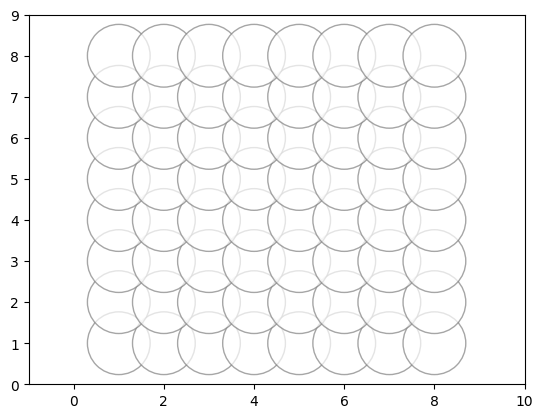

In [63]:
def led_scatter(colours: list):
    led_size = [SCALE*get_size(led) for led in colours]
    plt.cla()
    plt.scatter(x_val, y_val, s=led_size, c=colours, alpha=0.70, edgecolors='grey')
    plt.xlim([-1, 10])
    plt.ylim([0, 9])

led_scatter(arr_led)

In [64]:
def random_colour() -> str:
    colour = str(hex(np.random.randint(0, 0xffffff))).replace('0x', '#')
    while len(colour) < 7:
        colour = colour.replace('#', '0')
        colour = '#'+colour
    return colour

def generate_random() -> list:
    led_arr = [random_colour() for led in range(NUM_LED)]
    return led_arr

la = generate_random()

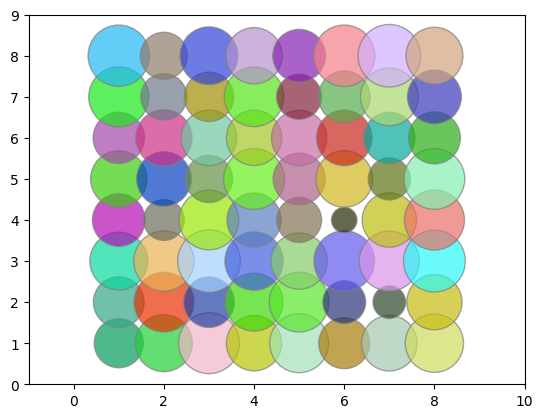

In [65]:
led_scatter(la)

In [66]:
FPS = 30
INTERVAL = 1/FPS
FRAMES = 30

In [67]:
# Runs infinite loop using a random set of numbers
def animate(i):
    led_arr = generate_random()
    led_scatter(led_arr)

ani = FuncAnimation(plt.gcf(), animate, interval=INTERVAL, frames=FRAMES, cache_frame_data=False)
plt.show()

c:\Users\newbi\Downloads\UniHack24\venv\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

In [68]:
def sim(show: np.ndarray):
    for i in range(len(show)):
        led_arr = show[i]
        led_scatter(led_arr)
        plt.pause(INTERVAL)

    plt.show()